# GTI770 - Systèmes intelligents et apprentissage machine

#### Alessandro L. Koerich

### Notebook Jupyter - 7_NearestNeighbors_Regression 

##### June 2018


### This is our second notebook on REGRESSION, which, like classification, is a supervised learning task.


In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn import neighbors

#from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [3]:
# We need to generate some data to play with...
# So, we need to choose a function of form r = f(x), where r is the output (label) and x is the input (features)
# Example of functions: 
## r = x + 2
## r = x^2 + 2*x + 4
## r = sin(2*pi*x)
## or any other function of x that you may want to play with.
# So, let's use the cosine function: r = cos(6*pi*x)

def true_fun(X):
  return np.cos(4 * np.pi * X)

In [4]:
# So, using the function above, we will generate "training data"
# for example, 60 data points.
np.random.seed(0)
n_samples = 128

# Let's generate 60 random data points and compute the corresponding "label", that means "r" for each data point
X = np.sort(np.random.rand(n_samples))

# Computing the corresponding "label", that means "r", for each generated data point in X 
r = true_fun(X)

# Computing the corresponding "label", that means "r", for each generated data point in X but with a random noise added
r = true_fun(X) + np.random.randn(n_samples) * 0.4


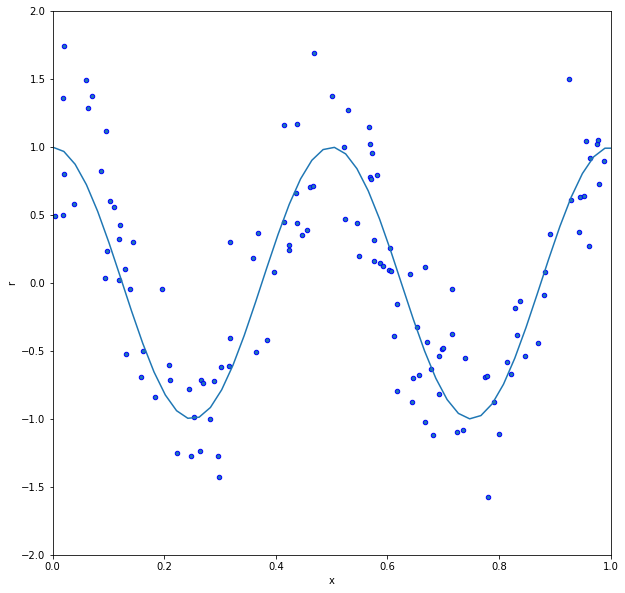

In [5]:
# Let's plot the data points...
# and also the function that we have used to generate them
plt.figure(figsize=(10, 10))
X_test = np.linspace(0, 2, 100)
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, r, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.show()

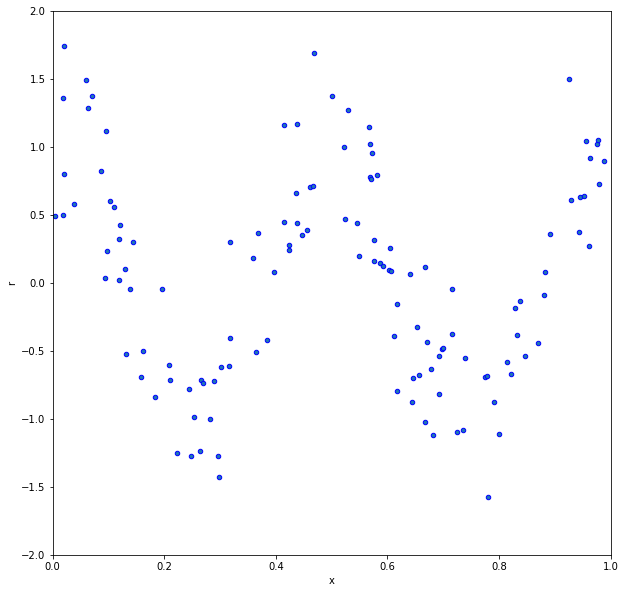

In [6]:
# Ok, now let's keep just the data points...

plt.figure(figsize=(10, 10))
X_test = np.linspace(0, 2, 100)
plt.scatter(X, r, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.show()

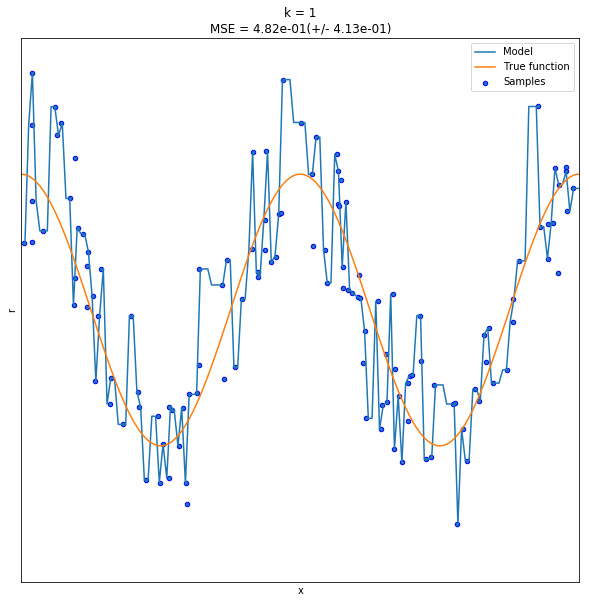

In [7]:
n_neighbors = 1
weights     = 'uniform'
metric      = 'euclidean'
algorithm   = 'brute'

plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())

nn_regression = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, algorithm=algorithm, metric=metric)

pipeline = Pipeline([("nn_regression", nn_regression)])
pipeline.fit(X[:, np.newaxis], r)

# Evaluate the models using crossvalidation
scores = cross_val_score(pipeline, X[:, np.newaxis], r, scoring="neg_mean_squared_error", cv=10)
X_test = np.linspace(0, 2, 300)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, r, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("k = {}\nMSE = {:.2e}(+/- {:.2e})".format(n_neighbors, -scores.mean(), scores.std()))
plt.show()

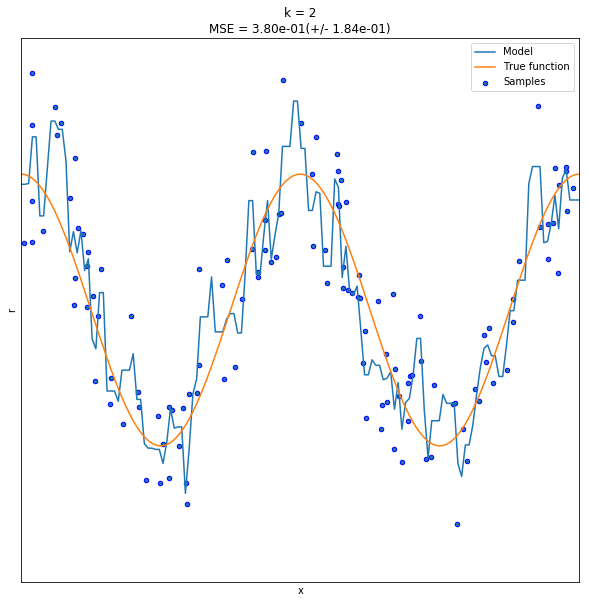

In [8]:
n_neighbors = 2
weights = 'uniform'

plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())

nn_regression = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, algorithm=algorithm, metric=metric)

pipeline = Pipeline([("nn_regression", nn_regression)])
pipeline.fit(X[:, np.newaxis], r)

# Evaluate the models using crossvalidation
scores = cross_val_score(pipeline, X[:, np.newaxis], r, scoring="neg_mean_squared_error", cv=10)
X_test = np.linspace(0, 2, 300)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, r, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("k = {}\nMSE = {:.2e}(+/- {:.2e})".format(n_neighbors, -scores.mean(), scores.std()))
plt.show()

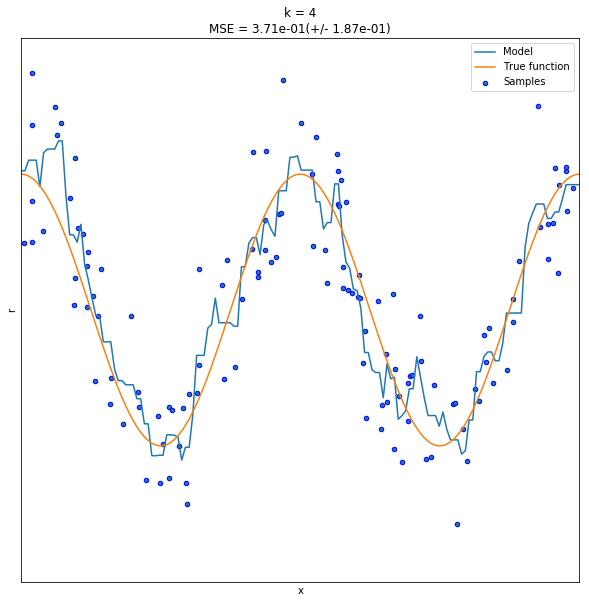

KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='euclidean',
          metric_params=None, n_jobs=None, n_neighbors=4, p=2,
          weights='uniform')

In [9]:
n_neighbors = 4
weights = 'uniform'

plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())

nn_regression = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, algorithm=algorithm, metric=metric)

pipeline = Pipeline([("nn_regression", nn_regression)])
pipeline.fit(X[:, np.newaxis], r)

# Evaluate the models using crossvalidation
scores = cross_val_score(pipeline, X[:, np.newaxis], r, scoring="neg_mean_squared_error", cv=10)
X_test = np.linspace(0, 2, 300)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, r, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("k = {}\nMSE = {:.2e}(+/- {:.2e})".format(n_neighbors, -scores.mean(), scores.std()))
plt.show()
nn_regression

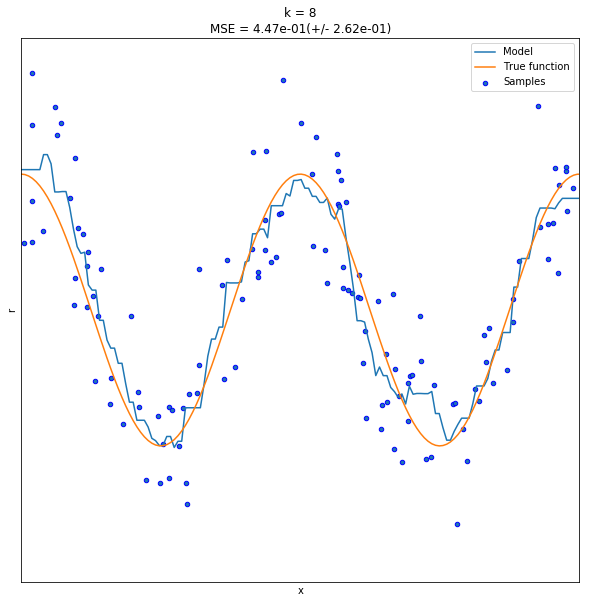

In [10]:
n_neighbors = 8
weights = 'uniform'

plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())

nn_regression = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, algorithm=algorithm, metric=metric)

pipeline = Pipeline([("nn_regression", nn_regression)])
pipeline.fit(X[:, np.newaxis], r)

# Evaluate the models using crossvalidation
scores = cross_val_score(pipeline, X[:, np.newaxis], r, scoring="neg_mean_squared_error", cv=10)
X_test = np.linspace(0, 2, 300)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, r, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("k = {}\nMSE = {:.2e}(+/- {:.2e})".format(n_neighbors, -scores.mean(), scores.std()))
plt.show()

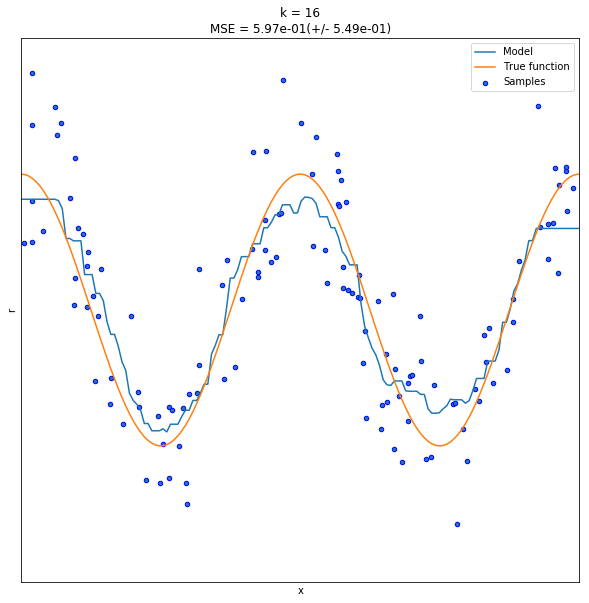

In [11]:
n_neighbors = 16
weights = 'uniform'

plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())

nn_regression = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, algorithm=algorithm, metric=metric)

pipeline = Pipeline([("nn_regression", nn_regression)])
pipeline.fit(X[:, np.newaxis], r)

# Evaluate the models using crossvalidation
scores = cross_val_score(pipeline, X[:, np.newaxis], r, scoring="neg_mean_squared_error", cv=10)
X_test = np.linspace(0, 2, 300)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, r, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("k = {}\nMSE = {:.2e}(+/- {:.2e})".format(n_neighbors, -scores.mean(), scores.std()))
plt.show()

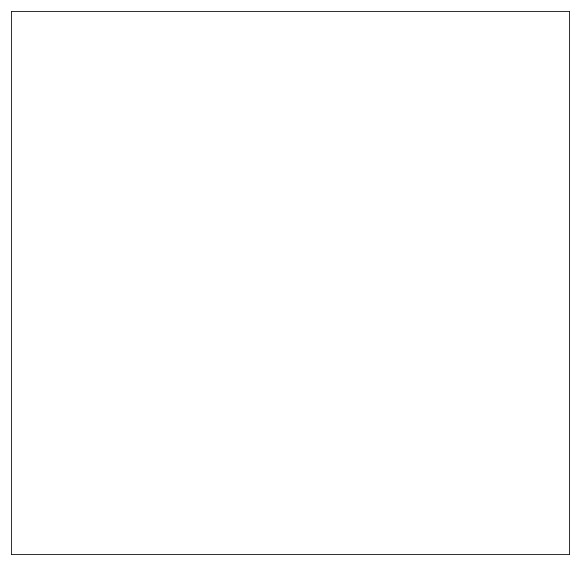

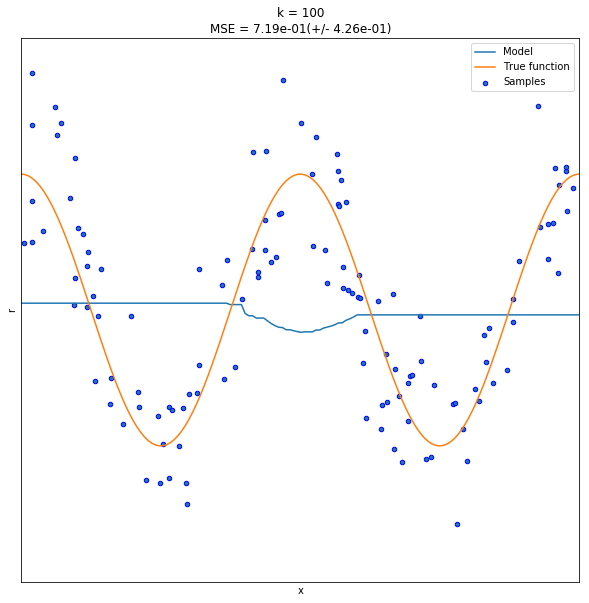

In [14]:
n_neighbors = 100
weights = 'uniform'

plt.figure(figsize=(10, 10))
ax = plt.subplot(1, 1, 1)
plt.setp(ax, xticks=(), yticks=())

nn_regression = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, algorithm=algorithm, metric=metric)

pipeline = Pipeline([("nn_regression", nn_regression)])
pipeline.fit(X[:, np.newaxis], r)

# Evaluate the models using crossvalidation
scores = cross_val_score(pipeline, X[:, np.newaxis], r, scoring="neg_mean_squared_error", cv=10)
X_test = np.linspace(0, 2, 300)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, r, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("r")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("k = {}\nMSE = {:.2e}(+/- {:.2e})".format(n_neighbors, -scores.mean(), scores.std()))
plt.show()

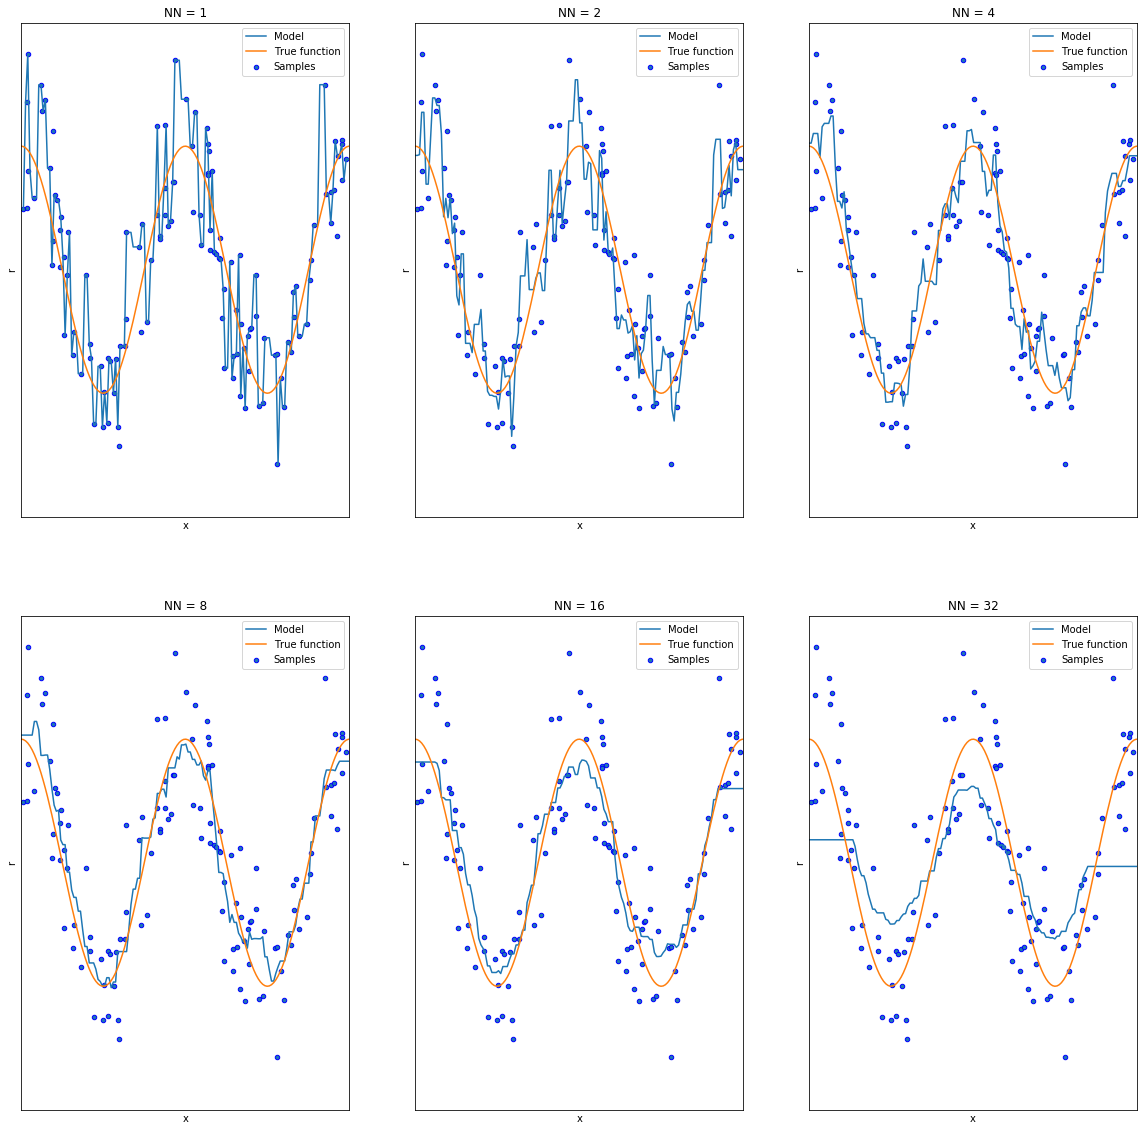

In [15]:
nn = [1, 2, 4, 8, 16, 32]

plt.figure(figsize=(20, 20))

for i in range(len(nn)):
    ax = plt.subplot(2, len(nn)/2, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    nn_regression = neighbors.KNeighborsRegressor(n_neighbors=nn[i], weights=weights, algorithm=algorithm, metric=metric)


    nn_regression.fit(X[:, np.newaxis], r)
        
    #Evaluate the models using crossvalidation
    scores = cross_val_score(nn_regression, X[:, np.newaxis], r,
                             scoring="neg_mean_squared_error", cv=10)
    plt.plot(X_test, nn_regression.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, r, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("r")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("NN = {}".format(nn[i]))
plt.show()

In [ ]:
print("Notebook ended")